# Project 2019 Programming for Data Analysis

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.<br>
* Investigate the types of variables involved, their likely distributions, and their relationships with each other<br>
* Synthesise/simulate a data set as closely matching their properties as possible.<br>
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.<br>


# Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

I have selected a dataset that is available on www.data.gov.ie. <br>
This is an initiative by the government of Ireland that makes data held by public bodies available and easily accessible online for reuse and redistribution.<br>
I have chosen the OPW Heritage Site Details open dataset.<br>
The Office of Public Works is a government department with responsibility for the day-to-day running of all National Monuments in State care and National Historic Properties.  The dataset relates to the Heritage Sites that are open to the public and contains various information collected in 2015.<br>
I chose this dataset because it is of interest to me in my professional life. <br>In this project, I will compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

In [13]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [2]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code
df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1")
#df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/New.csv", encoding="ISO-8859–1")

In [14]:
print("Load CSV file from a url into a dataframe and print")
df

Load CSV file from a url into a dataframe and print


,Id,GPS (WGS84) (deg) Coordinates,Name,Address,County,EirCode,Telephone,Fax,email,Heritage Ireland Webpage,...,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers,Adult Admission,Senior_Group,Child_Student,Family
0,50,"52.56946432612431°N, -8.782474994659424°E",Adare Castle,Adare,Co. Limerick,V94 HNH0,+353 61 39 66 66,+353 61 39 69 32,adareheritage@eircom.net,www.heritageireland.ie/en/ShannonRegion/AdareC...,...,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,"Toilets, toilet for visitors with disabilities...",http://www.heritageireland.ie/en/media/061205%...,Heritage Site,Shannon,NaN,Adult: EUR 6.00,Child/Student/Senior EUR 5.00,Family: EUR 15.00\r,None
1,32,"52.73522444703166°N, -6.720629017153264°E",Altamont Gardens,Tullow,Co. Carlow,R93 N882,+353 59 915 9444,+353 59 915 9510,altamontgardens@opw.ie,www.heritageireland.ie/en/South-East/AltamontG...,...,"Free, except for pre-booked guided tours.\r\n\...","Picnic tables, toilets, car park\r\n\r\nRestau...",http://www.heritageireland.ie/en/media/Altamon...,Heritage Site,South-East,"58,435","Free, except for pre-booked guided tours.",\nPre-booked Guided Tour Charges: \nEUR 3.00 \...,None,None
2,57,"53.35957224533105°N, -6.317420201876216°E",Aras an Uachtarain,Phoenix Park,Dublin 8,D08 E1W3,+353 1 677 0095\r\n1890 430 430 (Lo Call),+353 1 672 6454,phoenixparkvisitorcentre@opw.ie,www.heritageireland.ie/en/Dublin/ArasanUachtar...,...,Free admission tickets are issued at the Phoen...,Restaurant / Tearooms: Restaurant in the groun...,http://www.heritageireland.ie/en/media/ArasanU...,Heritage Site,Dublin,"4,343",Free admission tickets are issued at the Phoen...,None,None,None
3,58,"53.35090034751662°N, -6.287140846252441°E",Arbour Hill Cemetery,Arbour Hill,Dublin 7,NaN,+353 1 821 3021,NaN,superintendent.park@opw.ie,www.heritageireland.ie/en/Dublin/ArbourHillCem...,...,Free,Restaurant/Tearooms: None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN,Free,None,None,None
4,51,"52.32857791069304°N, -9.781485634192231°E",Ardfert Cathedral,Ardfert,Co. Kerry,V92 KR7P,+353 66 713 4711,+353 66 713 4711,ardfertcathedral@opw.ie,www.heritageireland.ie/en/ShannonRegion/Ardfer...,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,NaN,http://www.heritageireland.ie/en/media/Ardfert...,Heritage Site,Shannon,"7,802",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
5,8,"53.300140957473324°N, -8.74441657128761°E",Athenry Castle,Athenry,Co. Galway,H65 WP93,+353 91 84 47 97,+353 91 84 57 96,athenrycastle@opw.ie,www.heritageireland.ie/en/West/AthenryCastle/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, public car/coach parking available...",http://www.heritageireland.ie/en/media/Athenry...,Heritage Site,West,"10,848",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
6,9,"53.4187173267542°N, -9.275797011302833°E",Aughnanure Castle,Oughterard,Co. Galway,H91 PX20,+353 91 55 22 14,+353 91 55 72 44,aughnanurecastle@opw.ie,www.heritageireland.ie/en/West/AughnanureCastle/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car / coach park\r\n\r\nR...",http://www.heritageireland.ie/en/media/Aughnan...,Heritage Site,West,"36,929",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
7,33,"52.24573480922975°N, -6.967737585508862°E",Ballyhack Castle,Ballyhack,Co. Wexford,Y34 TN56,+353 51 38 94 68,+353 51 38 94 68,jerpointabbey@opw.ie,www.heritageireland.ie/en/South-East/Ballyahac...,...,Free,Parking nearby in Village.\r\n\r\nRestaurant/T...,http://www.heritageireland.ie/en/media/Ballyha...,Heritage Site,South-East,"2,613",Free,None,None,None
8,18,"51.90462628407013°N, -8.259398183085798°E",Barryscourt Castle,Carrigtwohill,Co.Cork,T45 Y290,+353 21 488 2218,NaN,barryscourtcastle@opw.ie,www.heritageireland.ie/en/South-West/Barryscou...,...,Free,"Exhibition, toilets, car park.\nPlease note th...",http://www.heritageireland.ie/en/media/Bar

**Comment:** The output from the original dataset contained over 2400 rows, with just 100 containing data.
Inclusion of the argument nrows=100 to specify that just 100rows are required.

In [4]:
df=pd.read_csv("https://www.opw.ie/en/media/opw-heritage-site-details.csv", encoding="ISO-8859–1",nrows=100)


In [5]:
df

,Id,X,Y,WGS84 Web Mercator (Auxiliary Sphere) Coordinates,GPS (WGS84) (deg) Coordinates,Latitude,Longitude,GPS Coordinates (Google Maps),Name,Address,...,email,Heritage Ireland Webpage,Website,Opening Hours,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers
0,50,-977660.64,6903754.18,"-977660.64, 6903754.18","52.56946432612431°N, -8.782474994659424°E",52.569464,-8.782474995,"52.56946432612431, -8.782474994659424",Adare Castle,Adare,...,adareheritage@eircom.net,www.heritageireland.ie/en/ShannonRegion/AdareC...,NaN,1 Jun - 30 Sep 2016\n\nAverage Length of Visit...,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,"Toilets, toilet for visitors with disabilities...",http://www.heritageireland.ie/en/media/061205%...,Heritage Site,Shannon,NaN
1,32,-748137.00,6934171.00,"-748137, 6934171","52.73522444703166°N, -6.720629017153264°E",52.735224,-6.720629017,"52.73522444703166, -6.720629017153264",Altamont Gardens,Tullow,...,altamontgardens@opw.ie,www.heritageireland.ie/en/South-East/AltamontG...,NaN,(Subject to change. Please telephone in advanc...,"Free, except for pre-booked guided tours.\r\n\...","Picnic tables, toilets, car park\r\n\r\nRestau...",http://www.heritageireland.ie/en/media/Altamon...,Heritage Site,South-East,"58,435"
2,57,-703252.00,7049788.00,"-703252, 7049788","53.35957224533105°N, -6.317420201876216°E",53.359572,-6.317420202,"53.35957224533105, -6.317420201876216",Aras an Uachtarain,Phoenix Park,...,phoenixparkvisitorcentre@opw.ie,www.heritageireland.ie/en/Dublin/ArasanUachtar...,www.president.ie & www.araskids.ie,NaN,Free admission tickets are issued at the Phoen...,Restaurant / Tearooms: Restaurant in the groun...,http://www.heritageireland.ie/en/media/ArasanU...,Heritage Site,Dublin,"4,343"
3,58,-699881.32,7048170.60,"-699881.32, 7048170.6","53.35090034751662°N, -6.287140846252441°E",53.350900,-6.287140846,"53.35090034751662, -6.287140846252441",Arbour Hill Cemetery,Arbour Hill,...,superintendent.park@opw.ie,www.heritageireland.ie/en/Dublin/ArbourHillCem...,NaN,All year round:\r\nMon-Fri: 08:00 - 16:00\r\nS...,Free,Restaurant/Tearooms: None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN
4,51,-1088870.00,6859756.00,"-1088870, 6859756","52.32857791069304°N, -9.781485634192231°E",52.328578,-9.781485634,"52.32857791069304, -9.781485634192231",Ardfert Cathedral,Ardfert,...,ardfertcathedral@opw.ie,www.heritageireland.ie/en/ShannonRegion/Ardfer...,NaN,28 April (open at 12:00) - \n28 September 201...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,NaN,http://www.heritageireland.ie/en/media/Ardfert...,Heritage Site,Shannon,"7,802"
5,8,-973424.00,7038710.00,"-973424, 7038710","53.300140957473324°N, -8.74441657128761°E",53.300141,-8.744416571,"53.300140957473324, -8.74441657128761",Athenry Castle,Athenry,...,athenrycastle@opw.ie,www.heritageireland.ie/en/West/AthenryCastle/,NaN,24 Mar - 1 Oct 2016: \nDaily 09:30 - 18:00\n02...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, public car/coach parking available...",http://www.heritageireland.ie/en/media/Athenry...,Heritage Site,West,"10,848"
6,9,-1032577.00,7060828.00,"-1032577, 7060828","53.4187173267542°N, -9.275797011302833°E",53.418717,-9.275797011,"53.4187173267542, -9.275797011302833",Aughnanure Castle,Oughterard,...,aughnanurecastle@opw.ie,www.heritageireland.ie/en/West/AughnanureCastle/,NaN,16 Mar - 2 Nov 2016: Daily 09:30-18:00\n \r\nA...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car / coach park\r\n\r\nR...",http://www.heritageireland.ie/en/media/Aughnan...,Heritage Site,West,"36,929"
7,33,-775645.00,6844680.00,"-775645, 6844680","52.24573480922975°N, -6.967737585508862°E",52.245735,-6.967737586,"52.24573480922975, -6.967737585508862",Ballyhack Castle,Ballyhack,...,jerpointabbey@opw.ie,www.heritageireland.ie/en/South-East/Ballyahac...,NaN,21 May - 31 Aug 2016: 09:30 - 17:00\nSaturday ...,Free,Parking nearby in Village.\r\n\r\nRestaurant/T...,http://www.heritageireland.i

**Comment** 
As stated previously, I intend to compare the data concerning sites' geographical location/region, cost of entry, number of visitors and the relationships between the datapoints.

There is sufficient information contained "Address" and "Region" columns to provide for such an investigation. I will therefore remove the rows 
* WGS84 Web Mercator (Auxiliary Sphere) Coordinates		
* Latitude	
* Longitude	
* GPS Coordinates (Google Maps)	
* And the column "X" and "Y" because it is not clear what this information relates to.

In [6]:
#Code adapted from https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python
#To delete a column, or multiple columns, use the name of the columns, and specify the “axis” as 1. 
df=df.drop(["X","Y","WGS84 Web Mercator (Auxiliary Sphere) Coordinates","Latitude","Longitude", "GPS Coordinates (Google Maps)"], axis=1)
df

,Id,GPS (WGS84) (deg) Coordinates,Name,Address,County,EirCode,Telephone,Fax,email,Heritage Ireland Webpage,Website,Opening Hours,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers
0,50,"52.56946432612431°N, -8.782474994659424°E",Adare Castle,Adare,Co. Limerick,V94 HNH0,+353 61 39 66 66,+353 61 39 69 32,adareheritage@eircom.net,www.heritageireland.ie/en/ShannonRegion/AdareC...,NaN,1 Jun - 30 Sep 2016\n\nAverage Length of Visit...,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,"Toilets, toilet for visitors with disabilities...",http://www.heritageireland.ie/en/media/061205%...,Heritage Site,Shannon,NaN
1,32,"52.73522444703166°N, -6.720629017153264°E",Altamont Gardens,Tullow,Co. Carlow,R93 N882,+353 59 915 9444,+353 59 915 9510,altamontgardens@opw.ie,www.heritageireland.ie/en/South-East/AltamontG...,NaN,(Subject to change. Please telephone in advanc...,"Free, except for pre-booked guided tours.\r\n\...","Picnic tables, toilets, car park\r\n\r\nRestau...",http://www.heritageireland.ie/en/media/Altamon...,Heritage Site,South-East,"58,435"
2,57,"53.35957224533105°N, -6.317420201876216°E",Aras an Uachtarain,Phoenix Park,Dublin 8,D08 E1W3,+353 1 677 0095\r\n1890 430 430 (Lo Call),+353 1 672 6454,phoenixparkvisitorcentre@opw.ie,www.heritageireland.ie/en/Dublin/ArasanUachtar...,www.president.ie & www.araskids.ie,NaN,Free admission tickets are issued at the Phoen...,Restaurant / Tearooms: Restaurant in the groun...,http://www.heritageireland.ie/en/media/ArasanU...,Heritage Site,Dublin,"4,343"
3,58,"53.35090034751662°N, -6.287140846252441°E",Arbour Hill Cemetery,Arbour Hill,Dublin 7,NaN,+353 1 821 3021,NaN,superintendent.park@opw.ie,www.heritageireland.ie/en/Dublin/ArbourHillCem...,NaN,All year round:\r\nMon-Fri: 08:00 - 16:00\r\nS...,Free,Restaurant/Tearooms: None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN
4,51,"52.32857791069304°N, -9.781485634192231°E",Ardfert Cathedral,Ardfert,Co. Kerry,V92 KR7P,+353 66 713 4711,+353 66 713 4711,ardfertcathedral@opw.ie,www.heritageireland.ie/en/ShannonRegion/Ardfer...,NaN,28 April (open at 12:00) - \n28 September 201...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,NaN,http://www.heritageireland.ie/en/media/Ardfert...,Heritage Site,Shannon,"7,802"
5,8,"53.300140957473324°N, -8.74441657128761°E",Athenry Castle,Athenry,Co. Galway,H65 WP93,+353 91 84 47 97,+353 91 84 57 96,athenrycastle@opw.ie,www.heritageireland.ie/en/West/AthenryCastle/,NaN,24 Mar - 1 Oct 2016: \nDaily 09:30 - 18:00\n02...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, public car/coach parking available...",http://www.heritageireland.ie/en/media/Athenry...,Heritage Site,West,"10,848"
6,9,"53.4187173267542°N, -9.275797011302833°E",Aughnanure Castle,Oughterard,Co. Galway,H91 PX20,+353 91 55 22 14,+353 91 55 72 44,aughnanurecastle@opw.ie,www.heritageireland.ie/en/West/AughnanureCastle/,NaN,16 Mar - 2 Nov 2016: Daily 09:30-18:00\n \r\nA...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car / coach park\r\n\r\nR...",http://www.heritageireland.ie/en/media/Aughnan...,Heritage Site,West,"36,929"
7,33,"52.24573480922975°N, -6.967737585508862°E",Ballyhack Castle,Ballyhack,Co. Wexford,Y34 TN56,+353 51 38 94 68,+353 51 38 94 68,jerpointabbey@opw.ie,www.heritageireland.ie/en/South-East/Ballyahac...,NaN,21 May - 31 Aug 2016: 09:30 - 17:00\nSaturday ...,Free,Parking nearby in Village.\r\n\r\nRestaurant/T...,http://www.heritageireland.ie/en/media/Ballyha...,Heritage Site,South-East,"2,613"
8,18,"51.90462628407013°N, -8.259398183085798°E",Barryscourt Castle,Carrigtwohill,Co.Cork,T45 Y290,+353 21 488 2218,NaN,barryscourtcastle@opw.ie,www.heritageireland.ie/en/South-West/Barryscou...,NaN,Please note that this site is closed to the pu...,Free,"Exhibition, toilets, car park.\nPlease note th...",http://www.heritageireland.ie/en/media/Barrysc...,Heritage Site,South-West,0
9,79,"53.724094208197506°N, -6.422565579414368°E",Battle of the Boyne,"Oldbridge, D

In [7]:
#Now several excess columns have been deleted, produce a list of the remaining columns.
print("Print Information about the OPW Heritage Site Details Open Dataset")
df.info()

Print Information about the OPW Heritage Site Details Open Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
Id                                100 non-null int64
GPS (WGS84) (deg)  Coordinates    100 non-null object
Name                              100 non-null object
Address                           100 non-null object
County                            100 non-null object
EirCode                           72 non-null object
Telephone                         98 non-null object
Fax                               74 non-null object
email                             90 non-null object
Heritage Ireland Webpage          99 non-null object
Website                           30 non-null object
                    95 non-null object
Admission Charges                 99 non-null object
Facilities                        98 non-null object
Image URL                         97 non-null object
Site Type                         99 non-nul

In [8]:
print("Print Contents of Admission Charges Column")
df['Admission Charges']

Print Contents of Admission Charges Column


0     Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...
1     Free, except for pre-booked guided tours.\r\n\...
2     Free admission tickets are issued at the Phoen...
3                                                  Free
4     Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
5     Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
6     Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
7                                                  Free
8                                                  Free
9     Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
10    Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
11    A Adult: EUR 4.00\r\nSen/Group: EUR 3.00\r\nCh...
12    Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
13    Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
14    Adult: EUR 7.00 \nSen/Group: EUR 5.00 \nChild/...
15    Adult: EUR 10.00 -Guided\n              EUR 8....
16    Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...
17    Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r

**Comment:** The Admission Charges column contains crucial data for this exercise, however it contains excess information than that will provide a challenge to adapt to financial information that is useful for data analysis.  

In [9]:
#code adapted from https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
  
# new data frame with split value columns 
new = df["Admission Charges"].str.split("\r\n\r", n = 3, expand = True) 
  
# making separate adult admission column from new data frame 
df["Adult Admission"]= new[0] 
  
# making separate Senior/Group column from new data frame 
df["Senior_Group"]= new[1] 

# making separate Child/Student column from new data frame 
df["Child_Student"]= new[2] 

# making separate Family and any other information column from new data frame 
df["Family"]= new[3] 

In [10]:
df

,Id,GPS (WGS84) (deg) Coordinates,Name,Address,County,EirCode,Telephone,Fax,email,Heritage Ireland Webpage,...,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers,Adult Admission,Senior_Group,Child_Student,Family
0,50,"52.56946432612431°N, -8.782474994659424°E",Adare Castle,Adare,Co. Limerick,V94 HNH0,+353 61 39 66 66,+353 61 39 69 32,adareheritage@eircom.net,www.heritageireland.ie/en/ShannonRegion/AdareC...,...,Adult: EUR 6.00\r\n\rChild/Student/Senior EUR ...,"Toilets, toilet for visitors with disabilities...",http://www.heritageireland.ie/en/media/061205%...,Heritage Site,Shannon,NaN,Adult: EUR 6.00,Child/Student/Senior EUR 5.00,Family: EUR 15.00\r,None
1,32,"52.73522444703166°N, -6.720629017153264°E",Altamont Gardens,Tullow,Co. Carlow,R93 N882,+353 59 915 9444,+353 59 915 9510,altamontgardens@opw.ie,www.heritageireland.ie/en/South-East/AltamontG...,...,"Free, except for pre-booked guided tours.\r\n\...","Picnic tables, toilets, car park\r\n\r\nRestau...",http://www.heritageireland.ie/en/media/Altamon...,Heritage Site,South-East,"58,435","Free, except for pre-booked guided tours.",\nPre-booked Guided Tour Charges: \nEUR 3.00 \...,None,None
2,57,"53.35957224533105°N, -6.317420201876216°E",Aras an Uachtarain,Phoenix Park,Dublin 8,D08 E1W3,+353 1 677 0095\r\n1890 430 430 (Lo Call),+353 1 672 6454,phoenixparkvisitorcentre@opw.ie,www.heritageireland.ie/en/Dublin/ArasanUachtar...,...,Free admission tickets are issued at the Phoen...,Restaurant / Tearooms: Restaurant in the groun...,http://www.heritageireland.ie/en/media/ArasanU...,Heritage Site,Dublin,"4,343",Free admission tickets are issued at the Phoen...,None,None,None
3,58,"53.35090034751662°N, -6.287140846252441°E",Arbour Hill Cemetery,Arbour Hill,Dublin 7,NaN,+353 1 821 3021,NaN,superintendent.park@opw.ie,www.heritageireland.ie/en/Dublin/ArbourHillCem...,...,Free,Restaurant/Tearooms: None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN,Free,None,None,None
4,51,"52.32857791069304°N, -9.781485634192231°E",Ardfert Cathedral,Ardfert,Co. Kerry,V92 KR7P,+353 66 713 4711,+353 66 713 4711,ardfertcathedral@opw.ie,www.heritageireland.ie/en/ShannonRegion/Ardfer...,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,NaN,http://www.heritageireland.ie/en/media/Ardfert...,Heritage Site,Shannon,"7,802",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
5,8,"53.300140957473324°N, -8.74441657128761°E",Athenry Castle,Athenry,Co. Galway,H65 WP93,+353 91 84 47 97,+353 91 84 57 96,athenrycastle@opw.ie,www.heritageireland.ie/en/West/AthenryCastle/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, public car/coach parking available...",http://www.heritageireland.ie/en/media/Athenry...,Heritage Site,West,"10,848",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
6,9,"53.4187173267542°N, -9.275797011302833°E",Aughnanure Castle,Oughterard,Co. Galway,H91 PX20,+353 91 55 22 14,+353 91 55 72 44,aughnanurecastle@opw.ie,www.heritageireland.ie/en/West/AughnanureCastle/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car / coach park\r\n\r\nR...",http://www.heritageireland.ie/en/media/Aughnan...,Heritage Site,West,"36,929",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
7,33,"52.24573480922975°N, -6.967737585508862°E",Ballyhack Castle,Ballyhack,Co. Wexford,Y34 TN56,+353 51 38 94 68,+353 51 38 94 68,jerpointabbey@opw.ie,www.heritageireland.ie/en/South-East/Ballyahac...,...,Free,Parking nearby in Village.\r\n\r\nRestaurant/T...,http://www.heritageireland.ie/en/media/Ballyha...,Heritage Site,South-East,"2,613",Free,None,None,None
8,18,"51.90462628407013°N, -8.259398183085798°E",Barryscourt Castle,Carrigtwohill,Co.Cork,T45 Y290,+353 21 488 2218,NaN,barryscourtcastle@opw.ie,www.heritageireland.ie/en/South-West/Barryscou...,...,Free,"Exhibition, toilets, car park.\nPlease note th...",http://www.heritageireland.ie/en/media/Bar

In [11]:
#Unsuccessful attempt to remove string element, replace with blank space and change datatype to float, this is due 
#to extra text that is contained in the column plus non-uniform delimiting characters.
#I fear the only solution to keep the task moving will be to revert to excel software!
#code adapted from https://www.ritchieng.com/pandas-changing-datatype/
df['Child_Student'] = df.Child_Student.str.replace ('Child/Student: EUR', '').astype(float)

ValueError: could not convert string to float: 'Family: EUR 15.00\r'

In [ ]:
#!
#Data Cleaning.jpeg
![Data](Data Cleaning.jpeg)
#![image](https://github.com/ClodaghMurphy/ProgDA_ProjectDec2019/blob/master/Data%20Cleaning.jpeg)
#![](image.png) or

### Summary of Section 1<br>
I have selected a dataset and carried out initial investigations to determine the contentsof the OPW Heritage Sites Dataset.<br>
I used pandas commands to remove columns of data that are not required and attempted to streamline the key data points which concern the pricing structure. <br>
Due to the limited timeframe involved in this project and the fact that it is not a test of data cleaning skills, I have decided to adjust it separately, re-save this truncated version in the github repository and continue the project with the updated format.  

# Investigate the types of variables involved, their likely distributions, and their relationships with each other

In [59]:
#Load the dataset from a URL
#To fix a Unicode error while reading a CSV file, encoding="ISO-8859–1" is added to the code   
print("Load CSV file from a url into a dataframe and print")
df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/opw-heritage-site-detailsNEW.csv", encoding="ISO-8859–1")

Load CSV file from a url into a dataframe and print


In [ ]:
df

In [60]:
#to save keystrokes, when "df" is typed, the notebook will automatically load the OPW data set from the github repository.
print("Information about the OPW Dataset")
df.info()

Information about the OPW Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
Name                    100 non-null object
County                  100 non-null object
Admission Charges       99 non-null object
Adult                   100 non-null int64
Senior                  100 non-null int64
Group                   100 non-null int64
Child                   100 non-null int64
Student                 100 non-null int64
Family                  100 non-null int64
Region                  100 non-null object
2015 Visitor Numbers    100 non-null int64
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


**Comment:**
Each row represents an individually named OPW Heritage Site, it's County and Region, data pertaining to the different entry fees and the number of visitors at each site in 2015.

In [ ]:
#Print a description of the output
print("Description of the OPW Dataset")
df.describe()
#if parentheses ()are not used, all columns will display but no useful summary statistics!
#According to pandas 0.25.1 documentation:
#For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. 
#By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

**Comment:** the output confirms that there are 100 data points<br>
A large amount of free sites and sites where no visitor numbers were collected produces unusual results in many of the columns e.g. the 25% and 50% quartiles are zero across the range.<br>
The standard deviations listed give an indication of the distance between the mean and all values, this figure is affected by the free entrance to over half of the sites in the dataset where tickets prices are concerned and the amount of null values where visitor numbers are concerned.


In [ ]:
#Print a description of the output
print("OPW Dataset Head")
df.head()
#The head() command returns 5 as a default when no argument is entered

In [15]:
#Print a description of the output
print("OPW Dataset Tail")
df.tail(10)
#The head() command returns 5 as a default when no argument is entered, I have entered 10 to be returned

OPW Dataset Tail


,Id,GPS (WGS84) (deg) Coordinates,Name,Address,County,EirCode,Telephone,Fax,email,Heritage Ireland Webpage,...,Admission Charges,Facilities,Image URL,Site Type,Region,2015 Visitor Numbers,Adult Admission,Senior_Group,Child_Student,Family
90,26,"52.1333121122405°N, -10.461930536160622°E",Ionad an Bhlascaoid Mhoir (The Blasket Centre),"Dun Chaoin, Baile an Fheirtearaigh, Tra Li",Co. Chiarrai,V92 TH73,+353 66 915 6444/\n+353 66 915 6371,+353 66 915 6446,blascaod@opw.ie,www.heritageireland.ie/en/blascaod/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Archive Room, Arts Events, Auditorium, Baby Ch...",http://www.heritageireland.ie/en/media/The%20B...,Heritage Site,South-West,"48,261",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
91,76,"53.34749741328512°N, -6.286652903395123°E",The Croppies Acre,Benburb Street,Dublin 7,NaN,+353 1 702 8811,NaN,info@heritageireland.ie,www.heritageireland.ie/en/Dublin/TheCroppiesAcre/,...,Free,None,http://www.heritageireland.ie/en/media/071024%...,Heritage Site,Dublin,NaN,Free,None,None,None
92,77,"53.33536551927739°N, -6.260556844391451°E",The Iveagh Gardens,Clonmel Street,Dublin 2,NaN,+353 1 475 7816,+353 1 475 5287,info@heritageireland.ie,www.heritageireland.ie/en/Dublin/TheIveaghGard...,...,Free,None,http://www.heritageireland.ie/en/media/TheIvea...,Heritage Site,Dublin,NaN,Free,None,None,None
93,46,"52.32192914823867°N, -6.932047519270793°E",The John F Kennedy Arboretum,"Ballysop, New Ross (12 km south of New Ross (o...",Co. Wexford,Y34 KA48,+353 51 38 81 71,+353 51 38 81 72,jfkarboretum@opw.ie,www.heritageireland.ie/en/South-East/TheJohnFK...,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibitions, toilets, toilet for disabled (at ...",http://www.heritageireland.ie/en/media/TheJohn...,Heritage Site,South-East,"96,910",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
94,47,"52.35291889533183°N, -7.701292863368022°E",The Main Guard,"1-3 Sarsfield Street, Clonmel",Co. Tipperary,E91 P7Y8,+353 52 612 7484\r\n+353 62 61 437 (During the...,+353 52 612 7517\n+353 62 61 988 (During the c...,mainguard@opw.ie\nrockofcashel@opw.ie (During ...,www.heritageireland.ie/en/South-East/TheMainGu...,...,Free,"Exhibitions, toilets, toilet for visitors with...",http://www.heritageireland.ie/en/media/Maingua...,Heritage Site,South-East,"7,951",Free,None,None,None
95,48,"52.356457787252445°N, -6.419873060030048°E",The Wexford Wildfowl Reserve,"National Parks and Wildlife Service, North Slo...",Co. Wexford,NaN,+353 53 91 23406,+353 53 91 24785,dominic.berridge@environ.ie,www.heritageireland.ie/en/South-East/TheWexfor...,...,Free,"Toilets, including disabled toilets, car/coach...",http://www.heritageireland.ie/en/media/TheWexf...,Heritage Site,South-East,NaN,Free,None,None,None
96,49,"52.237016183115635°N, -6.837895094342226°E",Tintern Abbey,"Saltmills, New Ross",Co. Wexford,Y34 KR64,+353 51 562650 \r\n+353 56 772 4623 (Winter T...,+353 51 562034,tinternabbey@opw.ie,www.heritageireland.ie/en/tinternabbey/,...,Adult: EUR 5.00\r\n\rSen/Group: EUR 4.00\r\n\r...,"Exhibition, toilets, car park.",http://www.heritageireland.ie/en/media/Tintern...,Heritage Site,South-East,"15,227",Adult: EUR 5.00,Sen/Group: EUR 4.00,Child/Student: EUR 3.00,Family: EUR 13.00\r
97,95,"53.554466017288824°N, -6.789673529890691°E",Trim Castle,Trim,Co. Meath,C15 HN90,+353 46 943 8619 or +353 46 9438964,+353 46 943 8618,trimcastle@opw.ie,www.heritageireland.ie/en/midlandseastcoast/Tr...,...,Including the Keep\nAdult: EUR 5.00\r\nSen/Gro...,"Display panels with reconstruction drawings, t...",http://www.heritageireland.ie/en/media/TrimCas...,Heritage Site,Midlands & East Coast,"86,972",Including the Keep\nAdult: EUR 5.00\r\nSen/Gro...,None,None,None
98,78,"53.34564524329351°N, -6.313789211497807°E",War Memorial Gardens,Islandbridge,Dublin 8,NaN,+353 1 475 7816 (gardens),+353 1 475 5287,info@heritageireland.ie,www.heritageireland.ie/en/Dublin/WarMemorialGa...,...,Free,Car

**Comment:** Checking the "head" and "tail" entries on the dataset is a useful exercise to quickly
check the integrity of the dataset, particularly if it is a large one or if it may contain
non-english characters because vowel accents may cause the data to be rendered incorrectly.

In [ ]:
#Print a description of the output
print("OPW Dataset: Site Name, Region, 2015 Visitor Numbers")
#this syntax is wrong : df['Name','Region', '2015 Visitor Numbers']
#this syntax [[double square brackets]] is correct
df[['Name','Region', '2015 Visitor Numbers']]
#the df command produces an indexed data series of the data columns that were passed into the argument.

**Comment:** This output provides an overview of visitor numbers in particular sites. It appears that some of the sites that don't contain any visitor data are public places in Dublin which would have a high amount (hundreds of thousands) of footfall e.g. Stephen's Green that would possibly skew figures even further than a null value.

In [ ]:
#Print a description of the output
print("OPW Dataset - Use of .loc and Boolean format as a sorting tool")
#this is a useful tool using Boolean values to select item
#the command outputs only the results== Sun from the set in the previous cell
df.loc[df.loc[:, 'Region'] == 'West']


**Comment:** An overview of the sites in the Western Region.  Despite it's location on an island, Dun Aonghasa has a high number of visitors.  The majority of sites fall into the same price range to visit.

In [ ]:

#Print a description of the output
print ("Pandas Groupby Function - Size of Grouping 'Adult' Admission Prices ")
#Code adapted from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by of a Single Column and Apply a Single Aggregate Method on a Column
#Groupby splits the data into a "group" depending on your choice of variable
#The size() argument returns a count of non-null values
df.groupby(by='Adult').size()

**Comment:** This groupby() output demonstrates that 51/100 of the Heritage Sites have no entry cost. The most common cost of entry for adults is €5.  The range of price is €0-€12.

In [ ]:
#Print a description of the output
print ("Pandas Groupby Function - Size of Grouping '2015 Visitor Numbers ")
#Code verbatim from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by of a Single Column and Apply a Single Aggregate Method on a Column
#Groupby splits the data into a "group" depending on your choice of variable
#The size() argument returns a count of non-null values
df.groupby(by='2015 Visitor Numbers').size()

**Comment:** 31 Heritage Sites have no Visitor Numbers statistics.
The remaining 69 Sites range from 1,750 - 553,348.

In [ ]:
#Print a description of the output
print ("Pandas Groupby Function - Grouping 'Region' showing size of Visitor Numbers column")
#Code verbatim from https://dfrieds.com/data-analysis/groupby-python-pandas
#Group by one columm and then perform an aggregate method on a different column.
#Region becomes the index in the output and the size (count of non-null values) of the Visitor Numbers
#is returned alongside it.
df.groupby(by='Region')['2015 Visitor Numbers'].size()


**Comment:** This output shows how Heritage Sites are located in the various regions of the Republic of Ireland.
The majority, 22, are in Dublin. The next most popular regions are Midlands & East Coast and South-East.

In [ ]:
#code adapted from https://dfrieds.com/data-analysis/groupby-python-pandas
#Below, group by the Region column and apply a lambda expression to the Visitor Numbers column. 
#The expression finds the range of Visitor Numbers - the maximum value subtracted by the minimum value. 
I also rename the single column returned on output so it's understandable.
df.groupby(by='Region').agg({'2015 Visitor Numbers': lambda numbers: numbers.max() - numbers.min()}).rename(columns={'2015 Visitor Numbers': "Range 2015 Visitor Numbers"})

In [ ]:
**Comment** The pandas command displays a range of visitor numbers for each region.

In [12]:
df.groupby(by='County').agg({'2015 Visitor Numbers': ['count', 'mean', 'sum']})

DataError: No numeric types to aggregate

**Comment** The pandas command displays a the number of Heritage Sites in each county with the mean and sum of visitor numbers in the county during 2015.

**Comment:**

In [ ]:

#Print a description of the output
print ("Data Visualisation - OPW Dataset hexplot of Region V 2015 Visitor Numbers")
#code verbatim from https://www.kaggle.com/ranjeetjain3/different-types-of-charts

sns.jointplot(y = 'Region', x = '2015 Visitor Numbers', data = df ,kind = 'hex')

In [ ]:
df.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False)

#Command to display the plot

#plt.show()

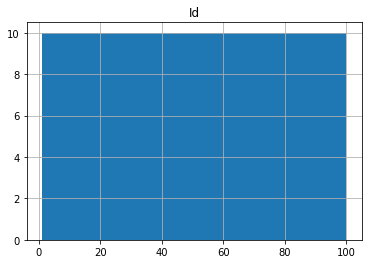

In [16]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#A histogram is an accurate representation of the distribution of numerical data
#This is a type of univariate analysis, i.e. looking at just one subset of the data at a time.
#A histogram relates only one variable

df.hist()
plt.show()


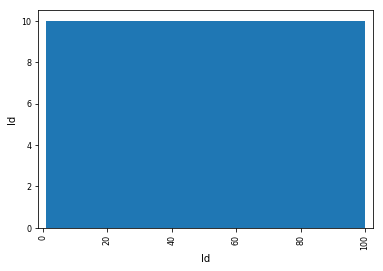

In [17]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')


#A scatterplot uses dots to represent pieces of data
#A scattermatrix displays all the fields on both x and y axis, 
# the variables are represented in both scatterplots and histograms
#This overview shows the correlation between the data and can help identify
#structured relationships between types of data

scatter_matrix(df)
plt.show()

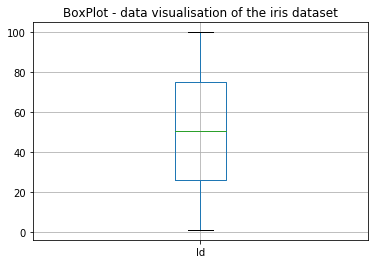

In [18]:
#05042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#Adapted from
# Basic Analysis of the Iris Data set Using Python by Oluwasogo Oluwafemi Ogundowole
#https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342
#Import pandas and matplotlib modules
import pandas
import matplotlib.pyplot as plt

#Rename the iris dataset to "dataset"
#dataset = pandas.read_csv('irisdataset.txt')

#Create a boxplot to view all the columns at once on the same scale which is helpful
#to put the data in context

plt.title ('BoxPlot - data visualisation of the iris dataset')
df.boxplot()
#Command to display the plot
plt.show()

In [19]:
#12042019 Investigate the DataSet
#Experimenting with pandas functions
#Adapted from
# https://stackoverflow.com/questions/33034243/calculating-the-mean-and-std-on-excel-file-using-python
#Import pandas module
import pandas
#
#The standard deviation is amount of variability (or spread) 
#among the numbers in a data set, that is the standard (or typical) 
# amount of deviation (or distance) from the mean
#https://wiki.kidzsearch.com/wiki/Standard_deviation

#dataset = pandas.read_csv('irisdataset.txt')
print(" 'std' calculates and displays the standard deviation in each column")
print(df.std())

 'std' calculates and displays the standard deviation in each column
Id    29.011492
dtype: float64


ValueError: scatter requires x column to be numeric

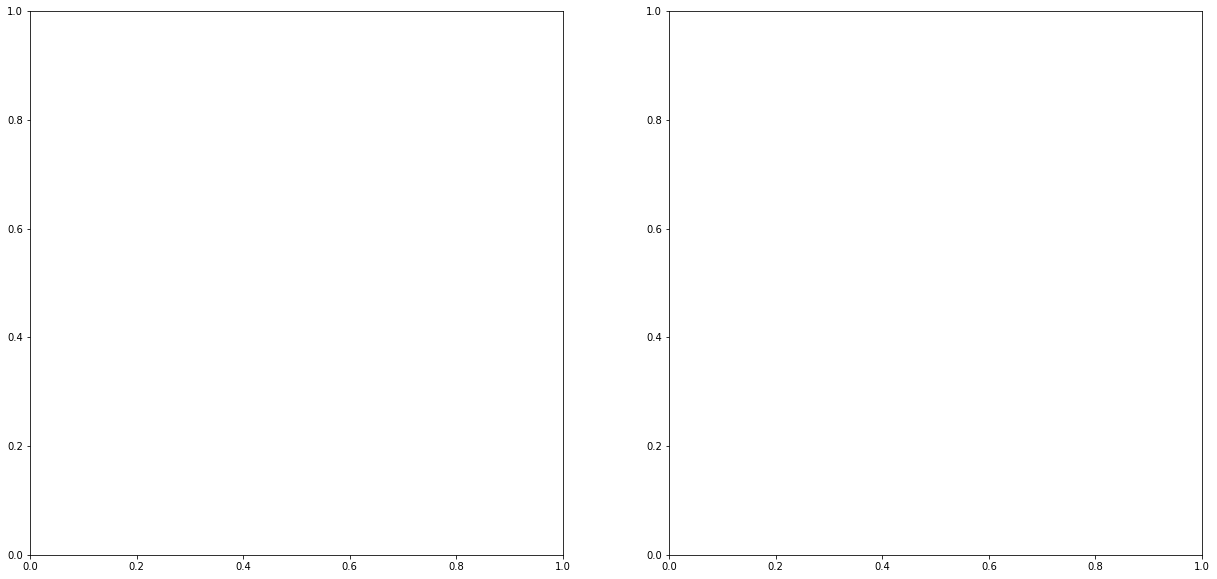

In [20]:
#12042019 Investigate the DataSet
#Data Visualisation with pands and matplotlib functions
#adapted from https://www.kaggle.com/abhishekkrg/python-iris-data-visualization-and-explanation

import matplotlib
import matplotlib.pyplot as plt
import pandas

#Plotting Scatterplot Petal Length vs Petal Width & Sepal Length vs Sepal width

#dataset = pandas.read_csv('irisdataset.txt')
#According to https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
#fig, ax = plt.sublots() creates just a figure and only one subplot
#ax can be either a single Axes object or an array of Axes objects if more than one subplot was created. 
fig,ax=plt.subplots(1,2,figsize=(21, 10))
#fig,ax=plt.subplots(1,2,figsize=(17, 9))

df.plot(y="Family",x="2015 Visitor Numbers",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
#df.plot(x="petal length in cm",y="petal width in cm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal Comparison ', ylabel='sepal-width')
ax[1].set(title='Petal Comparison',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

plt.show()
#While this plot does not separate the different species, it's an interesting image to
#view and recognise how some petals measurements are very obviously distinguishable

Data Visualisation - Countplot of OPW Regions


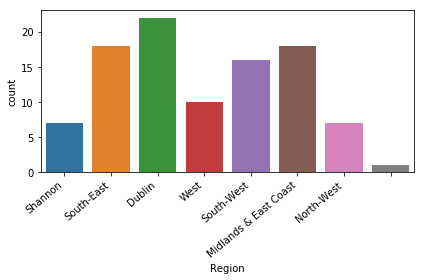

In [21]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Regions")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Region", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



Data Visualisation - Countplot of OPW Counties


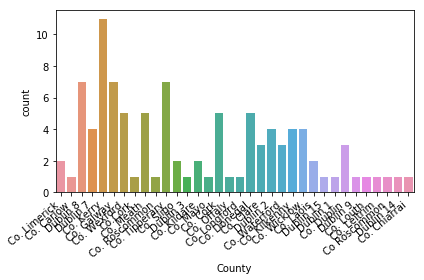

In [22]:
#Print a description of the output
print ("Data Visualisation - Countplot of OPW Counties")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="County", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#sns.countplot('County', data=df)

Data Visualisation - Countplot of 2015 Visitor Numbers


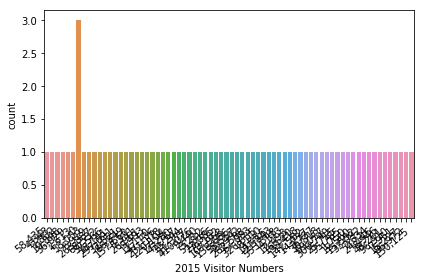

In [23]:


#Print a description of the output
print ("Data Visualisation - Countplot of 2015 Visitor Numbers")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="2015 Visitor Numbers", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [24]:
#Print a description of the output
print ("Data Visualisation - Countplot of Adult Admission Charges")
#Code amended from https://amitkushwaha.co.in/data-visualization-part-1.html
#Following on from the last plot, this countplot give a more accurate visualisation of the number of smokers versus non smokers.

ax = sns.countplot(x="Adult", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


Data Visualisation - Countplot of Adult Admission Charges


ValueError: Could not interpret input 'Adult'

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: can't multiply sequence by non-int of type 'float'

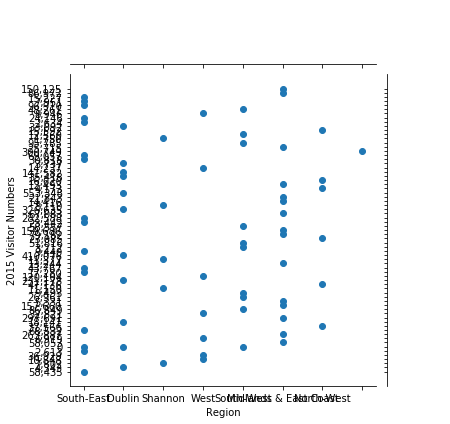

In [25]:
#https://seaborn.pydata.org/tutorial/distributions.html



sns.jointplot(x="Region", y="2015 Visitor Numbers", data=df);


In [63]:
import seaborn as sns

df.hist(bins=15, figsize=(15, 6), layout=(2, 4));

ValueError: The 'layout' keyword is not supported when 'by' is None

Data Visualisation - Countplot of Family Entrance Price


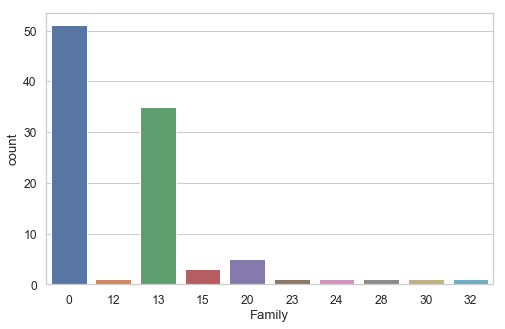

In [64]:
sns.countplot(df["Family"]);
print ("Data Visualisation - Countplot of Family Entrance Price")

In [ ]:
**Comment** 

Data Visualisation - Histograms setting out all numerical data


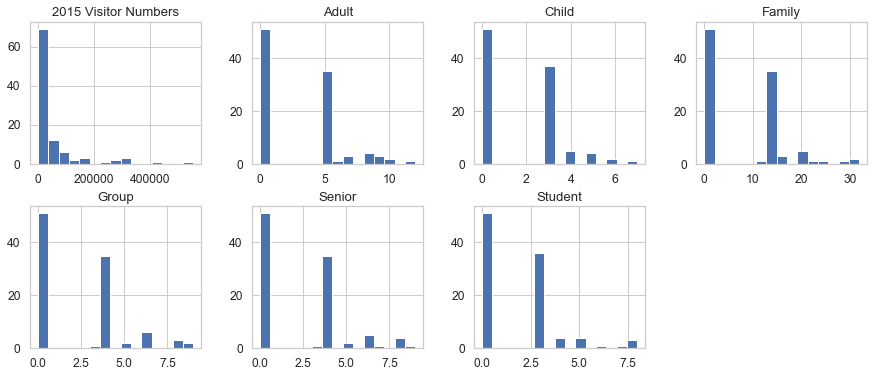

In [65]:
#code adapted from https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
df.hist(bins=15, figsize=(15, 6), layout=(2, 4));
print ("Data Visualisation - Histograms setting out all numerical data")

In [ ]:
**Comment** 

**Summary of Section 2**

The dataset contains information about 100 Heritage Sites managed by The Office of Public Works collected in 2015.
* 51% of the sites have free admission, 35% have an adult entrance fee of €5.
* 31 of the entries for 2015 Visitor Numbers contain a null value which affects the mean statistics that can be extracted from the dataset.
* The remaining 69 datapoints show that visitor numbers range from 1750 to 553348


The eleven types of variables in the truncated dataset are
* Name of Heritage Site, County,Region - all objects
* Admission Charges is the original column that contains all the variations of charges and is also in object datatype.
* I have divided the Admissions Charges for Adult, Senior, Group, Child, Student and Family into separate columns -float64 datatype
* 2015 Visitor Numbers are datatype int64 (integers).

their likely distributions, 
* Heritage Sites are in 7 different geographical regions, the majority in Dublin, South - East and South-West.
* The majority of Heritage Sites are free to enter, 35% of them have an Adult entrance price of €5.
* The entrance fee ranges from €0 - €12 for an individual.

and their relationships with each other


**Rules/Properties of the OPW Heritage Sites Dataset used to inform a synthesised Dataset**
* Every Heritage Site name is unique
* The county where the Heritage Site is located affects the Regional classification, if this information were to be shuffled, the county/region need to be linked.
* Adult	entrance price - a number between 0 and 12 rounded to the nearest euro.
* Senior / Group entrance price	
* Child	/ Student entrance price	
* Family entrance price
* 2015 Visitor Numbers

